### 10 Academy: Artificial Intelligence Mastery
#### Week 8 and 9 Challenges  
#### Project: Improved detection of fraud cases for e-commerce and bank transactions
##### Model Building and Training 


Ethel.C 

In [1]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\scripts'
src_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\src'
# Load the datasets
creditcard_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_credit_Data.csv")
fraud_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv")
fraud_data = fraud_data.drop(columns=['device_id', 'ip_address'])
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)


In [2]:
print("\nFraud Data:")
fraud_data.head()


Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,sex,age,class,purchase_hour,transaction_frequency,transaction_velocity,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uzbekistan,country_Viet Nam,country_Virgin Islands (U.S.),country_Zambia
0,22058,1424818549,1429325231,0.172414,1,0.679914,0,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,0,2.304476,0,1,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,1,2.304476,1,18,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,150084,1430255605,1430747690,0.241379,1,0.911994,0,13,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,221365,1437462592,1441824053,0.206897,1,1.376155,0,18,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
print("\nCredit Cared Data:")
creditcard_data.head()


Credit Cared Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,hour_of_day,Amount_scaled,Amount_binned_1,Amount_binned_2,Amount_binned_3,Amount_binned_medium,Amount_binned_high,Amount_binned
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,0.0,0.244964,0,1,0,1,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,0,0.0,-0.342475,1,0,0,0,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,0,0.0,1.160686,0,0,0,0,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,0,0.0,0.140534,0,1,0,1,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,0,0.0,-0.073403,0,1,0,1,0,2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from model_training import (
    train_logistic_regression, train_decision_tree, train_random_forest,
    train_xgboost, train_mlp, train_rnn, train_lstm,evaluate_models
)

In [5]:
# Separate features and target
X_credit = creditcard_data.drop(columns=['Class'])
y_credit = creditcard_data['Class']

X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

# Split data
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(
    X_credit, y_credit, test_size=0.3, random_state=42, stratify=y_credit
)

X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud
)


In [6]:
# Scale data
scaler = StandardScaler()
X_credit_train_scaled = scaler.fit_transform(X_credit_train)
X_credit_test_scaled = scaler.transform(X_credit_test)

X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)

# Train and evaluate models
models = {
    "LogisticRegression": train_logistic_regression,
    "DecisionTree": train_decision_tree,
    "RandomForest": train_random_forest,
    "XGBoost": train_xgboost,
    "MLP": train_mlp,
    "RNN": train_rnn,
    "LSTM": train_lstm,
}

##### Model Evaluation Fraud Detection 


Training LogisticRegression...
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41089
           1       0.95      0.05      0.10      4245

    accuracy                           0.91     45334
   macro avg       0.93      0.52      0.52     45334
weighted avg       0.91      0.91      0.87     45334

ROC-AUC Score: 0.5249544834461297



Training DecisionTree...
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     41089
           1       0.50      0.56      0.53      4245

    accuracy                           0.91     45334
   macro avg       0.72      0.75      0.74     45334
weighted avg       0.91      0.91      0.91     45334

ROC-AUC Score: 0.7512105484142397



Training RandomForest...
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.95      0.53      0.68      4245

    accuracy                           0.95     45334
   macro avg       0.95      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334

ROC-AUC Score: 0.7658440248108611


2025/02/11 15:31:00 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ethio\AppData\Local\Temp\tmp4hynzkkz\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



Training XGBoost...
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.78      0.54      0.64      4245

    accuracy                           0.94     45334
   macro avg       0.87      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334

ROC-AUC Score: 0.7621319184724726



Training MLP...
MLP Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41089
           1       0.85      0.53      0.66      4245

    accuracy                           0.95     45334
   macro avg       0.90      0.76      0.81     45334
weighted avg       0.94      0.95      0.94     45334

ROC-AUC Score: 0.7626480207103654



Training RNN...
X_train_sm shape after SMOTE: (191744, 158)
X_test shape before reshaping: (45334, 1, 158)
Epoch 1/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7801 - loss: 0.5081 - val_accuracy: 0.5788 - val_loss: 0.6447
Epoch 2/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8228 - loss: 0.4261 - val_accuracy: 0.5696 - val_loss: 0.6657
Epoch 3/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8250 - loss: 0.4158 - val_accuracy: 0.5720 - val_loss: 0.6438
Epoch 4/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8271 - loss: 0.4084 - val_accuracy: 0.5761 - val_loss: 0.5956
Epoch 5/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8276 - loss: 0.4030 - val_accuracy: 0.5729 - val_loss: 0.6887
Epoch 6/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8299 - loss: 0.3948 - val_accuracy: 0.5874 - val_loss: 0.5799
Epoch 7/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8296 - loss: 0.3912 - val_accuracy: 0.57

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

Training LSTM...
X_train shape before SMOTE: (105778, 1, 158)
X_train_sm shape after SMOTE: (191744, 158)
X_test shape before reshaping: (45334, 1, 158)
Epoch 1/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7809 - loss: 0.4941 - val_accuracy: 0.5622 - val_loss: 0.6924
Epoch 2/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8235 - loss: 0.4258 - val_accuracy: 0.5646 - val_loss: 0.6227
Epoch 3/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8255 - loss: 0.4153 - val_accuracy: 0.5701 - val_loss: 0.6126
Epoch 4/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8259 - loss: 0.4068 - val_accuracy: 0.5710 - val_loss: 0.6342
Epoch 5/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8267 - loss: 0.4019 - val_accuracy: 0.5833 - val_loss: 0.5839
Epoch 6/15
2397/2397 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8311 - loss: 0.3900 - val_accuracy: 0.5888 - val_loss: 0.5971
Epoch 7/15
2397/2397 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step

Final Model Metrics: {'LogisticRegression': {'accuracy': 0.910817487978118, 'precision': 0.9508928571428571, 'recall': 0.05017667844522968, 'f1_score': 0.09532333855448646}, 'DecisionTree': {'accuracy': 0.9055013896854458, 'precision': 0.4959417273673257, 'recall': 0.5613663133097762, 'f1_score': 0.5266298342541437}, 'RandomForest': {'accuracy': 0.9538536197997088, 'precision': 0.9513626834381551, 'recall': 0.5345111896348645, 'f1_score': 0.6844645550527904}, 'XGBoost': {'accuracy': 0.9429126042264084, 'precision': 0.7832478632478632, 'recall': 0.5396937573616019, 'f1_score': 0.6390516039051604}, 'MLP': {'accuracy': 0.9476772400405876, 'precision': 0.8508804795803672, 'recall': 0.5349823321554771, 'f1_score': 0.6569279722302575}, 'RNN': {'accuracy': 0.9333392155997706, 'precision': 0.6786444639205376, 'recall': 0.5472320376914016, 'f1_score': 0.6058946270213876}, 'LSTM': {'accuracy': 0.9327877531212776, 'precision': 0.6735225955967555, 'recall': 

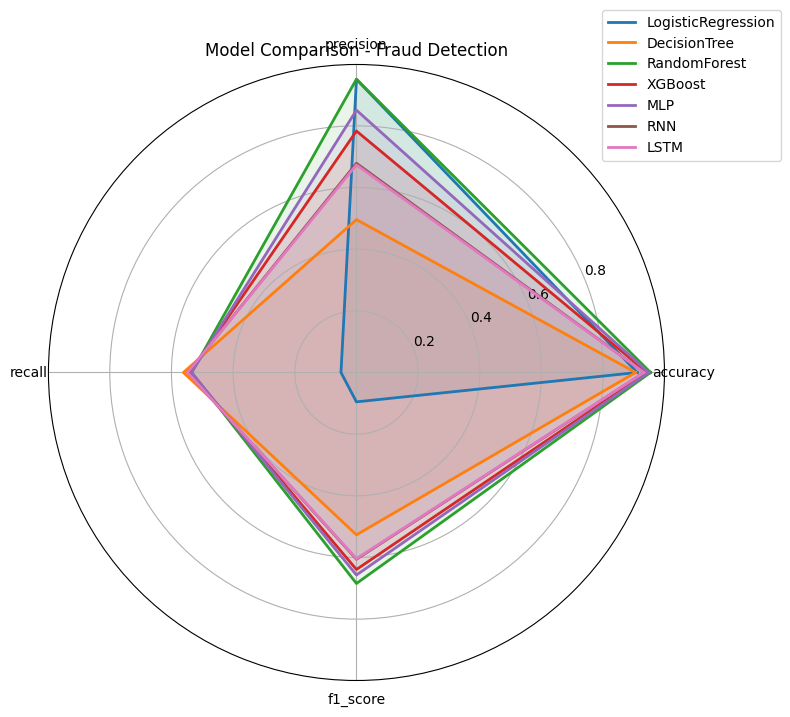

In [7]:
evaluate_models(models, X_fraud_train_scaled, y_fraud_train, X_fraud_test_scaled, y_fraud_test, "Fraud Detection")

Random Forest appears to be the best model for fraud detection. It achieves a high precision of 95% for the fraudulent class (1) while maintaining a recall of 53%, meaning it captures a reasonable number of actual fraud cases without generating too many false positives. Additionally, its ROC-AUC score of 0.7658 is the highest among all models, indicating a good balance between true positive and false positive rates. While XGBoost and MLP also perform well, their slightly lower ROC-AUC scores suggest that they may not generalize as effectively as Random Forest. Logistic Regression performs poorly, especially in recall (5%), meaning it fails to detect most fraud cases despite its high accuracy. Decision Tree shows an improvement over Logistic Regression but does not surpass Random Forest in terms of overall effectiveness. Given these factors, Random Forest is the best choice because it provides the best trade-off between precision, recall, and overall classification performance, making it suitable for fraud detection where minimizing false negatives is crucial.

##### Model Evaluation for Credit Card 


Training LogisticRegression...
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8073386402992476



Training DecisionTree...
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.71      0.74       148

    accuracy                           1.00     85443
   macro avg       0.89      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8545597314883322



Training RandomForest...
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8547121437047576



Training XGBoost...
XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8918098237753552



Training MLP...
MLP Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.75      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8748651738085468



Training RNN...
X_train_sm shape after SMOTE: (398040, 38)
X_test shape before reshaping: (85443, 1, 38)
Epoch 1/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9776 - loss: 0.0602 - val_accuracy: 0.9999 - val_loss: 0.0023
Epoch 2/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9956 - val_loss: 0.0122
Epoch 3/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9999 - val_loss: 0.0028
Epoch 4/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.2161e-04
Epoch 5/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.4148e-04
Epoch 6/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 1.3145e-04
Epoch 7/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9997 - loss: 0.0012 - val_a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step

Training LSTM...
X_train shape before SMOTE: (199364, 1, 38)
X_train_sm shape after SMOTE: (398040, 38)
X_test shape before reshaping: (85443, 1, 38)
Epoch 1/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9814 - loss: 0.0730 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 8.0336e-04
Epoch 3/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 6.5168e-04
Epoch 4/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.8767e-04
Epoch 5/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9983 - val_loss: 0.0088
Epoch 6/15
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.7770e-04
Epoch 7/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step

Final Model Metrics: {'LogisticRegression': {'accuracy': 0.9991456292499094, 'precision': 0.8504672897196262, 'recall': 0.6148648648648649, 'f1_score': 0.7137254901960784}, 'DecisionTree': {'accuracy': 0.9991573329588147, 'precision': 0.7835820895522388, 'recall': 0.7094594594594594, 'f1_score': 0.7446808510638298}, 'RandomForest': {'accuracy': 0.9994616293903538, 'precision': 0.9722222222222222, 'recall': 0.7094594594594594, 'f1_score': 0.8203125}, 'XGBoost': {'accuracy': 0.9994616293903538, 'precision': 0.8923076923076924, 'recall': 0.7837837837837838, 'f1_score': 0.8345323741007195}, 'MLP': {'accuracy': 0.9992977774656788, 'precision': 0.8283582089552238, 'recall': 0.75, 'f1_score': 0.7872340425531915}, 'RNN': {'accuracy': 0.9990285921608558, 'precision': 0.6946107784431138, 'recall': 0.7837837837837838, 'f1_score': 0.7365079365079366}, 'LSTM': {'accuracy': 0.9990988144142879, 'precision': 0.7320261437908496, 'recall': 0.7567567567567568, 'f1_

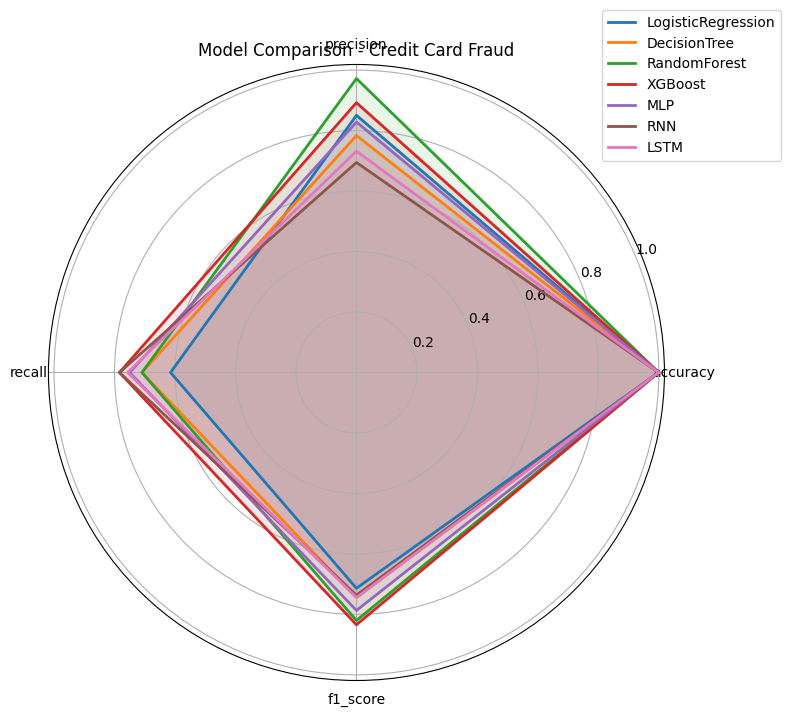

In [8]:
evaluate_models(models, X_credit_train_scaled, y_credit_train, X_credit_test_scaled, y_credit_test, "Credit Card Fraud")

ROC-AUC scores are higher for the models like Random Forest and XGBoost, which suggests that these models have a better overall ability to discriminate between classes.
#### Model Selection 

Since Random Forest model have better performance for both fraud_dataset(e-commerce) and credit card(bank transaction) 
RANDOM FOREST IS SELECTED for hyperparameter tuning, model interpretation and deployment
